# **Apprentissage Supervisé : Régression Linéaire**

1- Régression linéaire simple

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
file_path='/content/drive/MyDrive/homeprices.csv'
homeprices = pd.read_csv(file_path)
homeprices.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


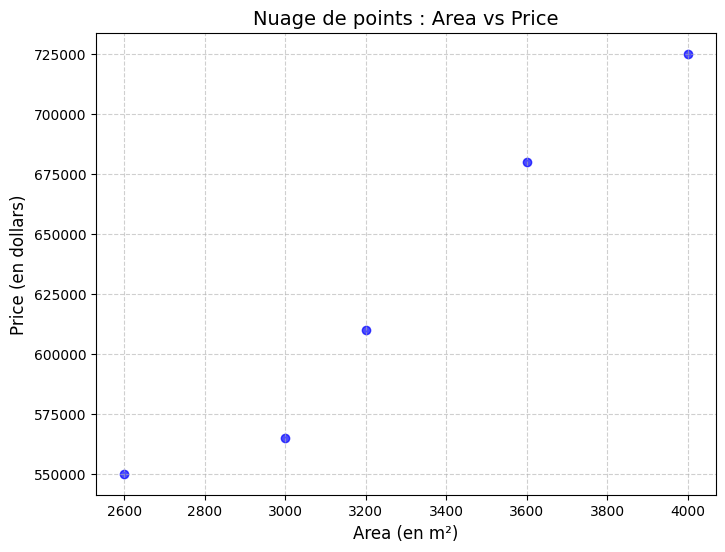

In [3]:
# Tracer un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(homeprices['area'], homeprices['price'], color='blue', alpha=0.7)
plt.title("Nuage de points : Area vs Price", fontsize=14)
plt.xlabel("Area (en m²)", fontsize=12)
plt.ylabel("Price (en dollars)", fontsize=12)

# Afficher la figure
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [5]:
# Créer un objet de régression linéaire
model = linear_model.LinearRegression()

# Préparer les données d'entrée (x) et de sortie (y)
x= homeprices[['area']]
y= homeprices['price']
# Entraîner le modèle
model.fit(x, y)

LinearRegression()

In [7]:
# Charger le fichier areas.csv
areas_df = pd.read_csv('/content/drive/MyDrive/areas.csv')

# Prédire les prix des maisons
predictions = model.predict(areas_df[['area']])

# Afficher les résultats
print(predictions)

[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959]


In [8]:
import pickle

# Sauvegarder le modèle
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

2- Régression linéaire Multivariée

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from joblib import dump, load

multi_df = pd.read_csv('/content/drive/MyDrive/homepricesmulti.csv', sep= '\t')
multi_df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [10]:
# 3. Remplir les valeurs NA avec la valeur médiane d'une colonne
for col in multi_df.columns:
    if multi_df[col].isnull().sum() > 0:
        multi_df[col].fillna(multi_df[col].median(), inplace=True)

<ipython-input-10-469ce6af33d9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  multi_df[col].fillna(multi_df[col].median(), inplace=True)


In [11]:
multi_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
x = multi_df[['area', 'bedrooms', 'age']]
y = multi_df['price']
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [13]:
predicted_price = model.predict([[3000, 3, 40]])
print(f"Le prix prédit pour une maison de 3000 m², 3 chambres, et 40 ans d'âge est : {predicted_price[0]}")

Le prix prédit pour une maison de 3000 m², 3 chambres, et 40 ans d'âge est : 498408.2515803067


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
#5. Sauvegarder/charger le Modèle Entraîné en utilisant joblib(alternative à pickle)
from joblib import dump, load

# Sauvegarder le modéle
dump(model, 'house_price_model_multi.joblib')

# Charger le modéle
loaded_model = load('house_price_model_multi.joblib')

# Vérifier la prédiction avec le modele chargé
new_predicted_price = loaded_model.predict([[4000, 3, 20]])
print(f"Le prix prédit avec le modele chargé est : {new_predicted_price[0]}")

Le prix prédit avec le modele chargé est : 675105.0516951008


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Categorical Variables et One Hot Encoding**

In [15]:
import pandas as pd

In [18]:
data = pd.read_csv('/content/drive/MyDrive/one_hot_encoding_homeprices.csv', sep= '\t')
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [19]:
# Créer les variables fictives pour les colonnes catégorielles
df_encoded = pd.get_dummies(data, columns=['town'], drop_first=True)
df_encoded

,area,price,town_robinsville,town_west windsor
0,2600,550000,False,False
1,3000,565000,False,False
2,3200,610000,False,False
3,3600,680000,False,False
4,4000,725000,False,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,True,False


In [20]:
df_combined = pd.concat([data, df_encoded], axis=1)
df_combined

,town,area,price,area,price,town_robinsville,town_west windsor
0,monroe township,2600,550000,2600,550000,False,False
1,monroe township,3000,565000,3000,565000,False,False
2,monroe township,3200,610000,3200,610000,False,False
3,monroe township,3600,680000,3600,680000,False,False
4,monroe township,4000,725000,4000,725000,False,False
5,west windsor,2600,585000,2600,585000,False,True
6,west windsor,2800,615000,2800,615000,False,True
7,west windsor,3300,650000,3300,650000,False,True
8,west windsor,3600,710000,3600,710000,False,True
9,robinsville,2600,575000,2600,575000,True,False


In [25]:
# 5. Supprimer la colonne originale 'town' car elle est maintenant encodée
df_combined = df_combined.drop('town', axis=1)

KeyError: "['town'] not found in axis"

In [26]:
df_encoded

,area,price,town_robinsville,town_west windsor
0,2600,550000,False,False
1,3000,565000,False,False
2,3200,610000,False,False
3,3600,680000,False,False
4,4000,725000,False,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,True,False


In [27]:
# 6. Créer et entraîner un modèle de régression linéaire en utilisant Sklearn
X = df_combined.drop('price', axis=1)  # Variables indépendantes
y = df_combined['price']  # Variable cible

# Créer l'objet modèle
model = LinearRegression()

# Entraîner le modèle
model.fit(X, y)

LinearRegression()

# **Training et Testing des Donées **

In [31]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
car = pd.read_csv('/content/drive/MyDrive/Train_test_carprices.csv', sep= ',')
car

,Mileage,Age(yrs),Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


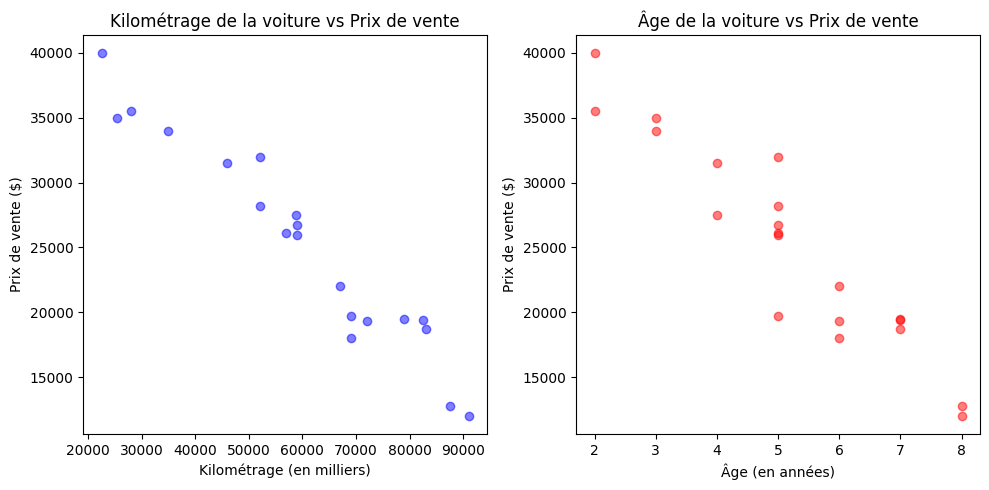

In [32]:
# 3. Créer les diagrammes de dispersion
# Diagramme de Kilométrage vs Prix de vente
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Créer une figure avec 1 ligne et 2 colonnes
plt.scatter(car['Mileage'], car['Price($)'], color='blue', alpha=0.5)
plt.title('Kilométrage de la voiture vs Prix de vente')
plt.xlabel('Kilométrage (en milliers)')
plt.ylabel('Prix de vente ($)')

# Diagramme de l'Âge vs Prix de vente
plt.subplot(1, 2, 2)
plt.scatter(car['Age(yrs)'], car['Price($)'], color='red', alpha=0.5)
plt.title('Âge de la voiture vs Prix de vente')
plt.xlabel('Âge (en années)')
plt.ylabel('Prix de vente ($)')

# Afficher les diagrammes
plt.tight_layout()  # Pour éviter que les labels ne se chevauchent
plt.show()

In [33]:
X= car[['Mileage', 'Age(yrs)']]
y= car['Price($)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
score = model.score(X, y)
print(f"Score : {score}")

Score : 0.9279865529182805


# **Apprentissage Supervisé : Régression Logistique**

In [36]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
insurance_data= pd.read_csv('/content/drive/MyDrive/insurance_data.csv')
insurance_data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


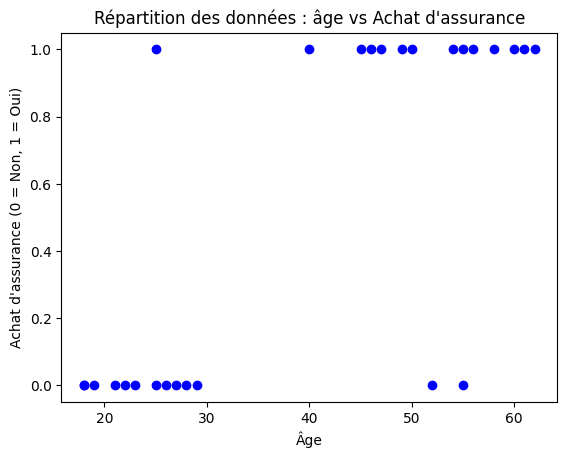

In [39]:
# Nuage de points :relation entre l'âge et l'achat de l'assurance
plt.scatter(insurance_data['age'], insurance_data['bought_insurance'], color='blue')
plt.title('Répartition des données : âge vs Achat d\'assurance')
plt.xlabel('Âge')
plt.ylabel('Achat d\'assurance (0 = Non, 1 = Oui)')
plt.show()

In [40]:
X = insurance_data[['age']]
y = insurance_data['bought_insurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Obtenir les probabilités de prédiction
probabilites = model.predict_proba(X)
print("Probabilités de prédiction pour chaque classe :")
print(probabilites)

# Vérifier la précision du modèle
score = model.score(X, y)
print(f"Précision du modèle : {score}")


Probabilités de prédiction pour chaque classe :
[[0.91610842 0.08389158]
 [0.87903892 0.12096108]
 [0.26832587 0.73167413]
 [0.15684648 0.84315352]
 [0.29579906 0.70420094]
 [0.09753837 0.90246163]
 [0.11015776 0.88984224]
 [0.05908481 0.94091519]
 [0.04567825 0.95432175]
 [0.05197447 0.94802553]
 [0.94948302 0.05051698]
 [0.82865307 0.17134693]
 [0.8470775  0.1529225 ]
 [0.80851063 0.19148937]
 [0.21846528 0.78153472]
 [0.11015776 0.88984224]
 [0.87903892 0.12096108]
 [0.07611236 0.92388764]
 [0.94255999 0.05744001]
 [0.94948302 0.05051698]
 [0.92596916 0.07403084]
 [0.86384632 0.13615368]
 [0.48678179 0.51321821]
 [0.32483633 0.67516367]
 [0.19617379 0.80382621]
 [0.12418517 0.87581483]
 [0.9050689  0.0949311 ]]
Précision du modèle : 0.8888888888888888



# Apprentissage Supervisé : Arbre de décision **bold text**


In [44]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
salaries = pd.read_csv('/content/drive/MyDrive/salaries.csv')
salaries.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [45]:
# Créer un encodeur pour les colonnes catégorielles
label_company = LabelEncoder()
label_job = LabelEncoder()
label_degree = LabelEncoder()

# Encoder les colonnes 'company', 'job', et 'degree'
salaries['company'] = label_company.fit_transform(salaries['company'])
salaries['job'] = label_job.fit_transform(salaries['job'])
salaries['degree'] = label_degree.fit_transform(salaries['degree'])

salaries

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [46]:
# Séparer les caractéristiques (inputs) et la cible (target)
inputs_n = salaries[['company', 'job', 'degree']]  # Colonnes d'entrées
target = salaries['salary_more_then_100k']  # La colonne cible

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

# Créer et entraîner le modèle (par exemple, un arbre de décision)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prédire les valeurs cibles pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}%")

Précision du modèle : 0.75%


In [47]:
# Exemple de nouvelles données à prédire
new_data = pd.DataFrame({
    'company': [1, 0],
    'job': [0, 2],
    'degree': [1, 0]
})

# Prédire les classes pour les nouvelles données (binaire: 0 ou 1)
predictions = model.predict(new_data)

# Afficher les prédictions
print("Prédictions pour les nouvelles données : ", predictions)

Prédictions pour les nouvelles données :  [1 0]


# **Apprentissage non supervisé : Clustering**

In [50]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

income= pd.read_csv('/content/drive/MyDrive/income.csv', sep='\t')
income

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


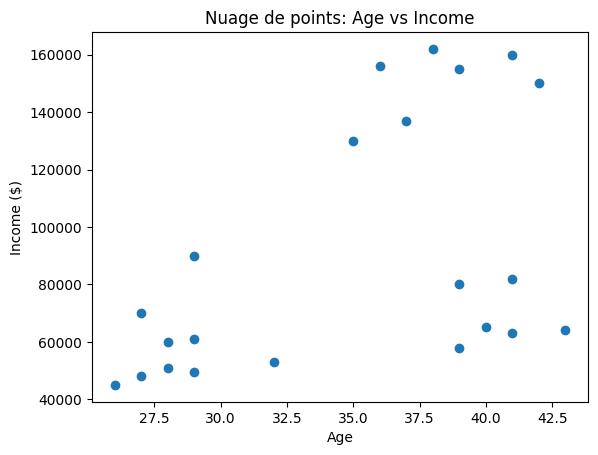

In [51]:
# Tracer un nuage de points entre l'âge et le revenu
plt.scatter(income['Age'], income['Income($)'])
plt.title('Nuage de points: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()

In [52]:
# Initialiser KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, init='random', random_state=42)

# Appliquer KMeans sur les données
kmeans.fit(income[['Age', 'Income($)']])

KMeans(init='random', n_clusters=3, random_state=42)

In [53]:
# Prédire les groupes des données
predictions = kmeans.predict(income[['Age', 'Income($)']])

# Ajouter les prédictions comme une nouvelle colonne dans le DataFrame
income['cluster'] = predictions

# Afficher les premières lignes avec les clusters assignés
data.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


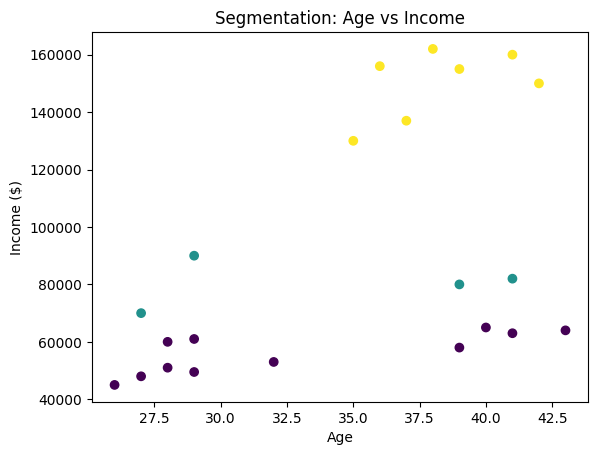

In [54]:
# Visualiser les résultats en coloriant les points en fonction des clusters
plt.scatter(income['Age'], income['Income($)'], c=income['cluster'], cmap='viridis')
plt.title('Segmentation: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()

Centres des clusters :  [[3.29090909e+01 5.61363636e+04]
 [3.40000000e+01 8.05000000e+04]
 [3.82857143e+01 1.50000000e+05]]


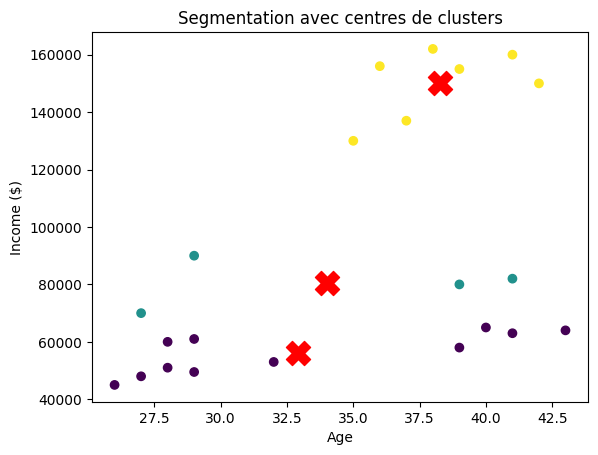

In [55]:
# Utiliser fit_predict pour ajuster et prédire les clusters en même temps
predictions = kmeans.fit_predict(income[['Age', 'Income($)']])

# Afficher les centres des clusters
print("Centres des clusters : ", kmeans.cluster_centers_)

# Visualiser les centres des clusters sur le graphique
plt.scatter(income['Age'], income['Income($)'], c=predictions, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Centres des clusters
plt.title('Segmentation avec centres de clusters')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()

In [56]:
# Appliquer MinMaxScaler pour normaliser les données
scaler = MinMaxScaler()
income_scaled = scaler.fit_transform(income[['Age', 'Income($)']])

# Réappliquer KMeans sur les données normalisées
kmeans_scaled = KMeans(n_clusters=3, init='random', random_state=42)
kmeans_scaled.fit(income_scaled)

# Prédire les groupes après normalisation
predictions_scaled = kmeans_scaled.predict(income_scaled)

# Ajouter les clusters prédits dans le DataFrame
income['cluster_scaled'] = predictions_scaled

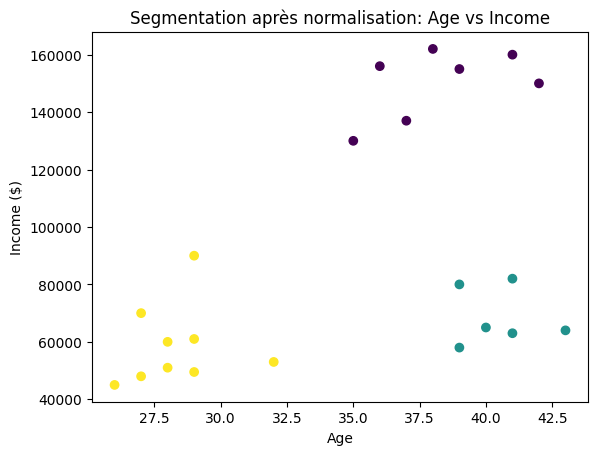

In [57]:
# Visualiser les résultats de segmentation sur les données normalisées
plt.scatter(income['Age'], income['Income($)'], c=income['cluster_scaled'], cmap='viridis')
plt.title('Segmentation après normalisation: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()